<a href="https://colab.research.google.com/github/tejajijo/Thesis_CS648_2023/blob/main/Thesis_CS648.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Data Exploration

***Reading the datset marks.csv***


In [ ]:
marks = pd.read_csv('marks.csv')
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seat_no       5211 non-null   int64  
 1   paper_1_IA    4836 non-null   float64
 2   paper_2_IA    4837 non-null   float64
 3   paper_3_IA    4838 non-null   float64
 4   paper_4_IA    4838 non-null   float64
 5   paper_5_IA    4838 non-null   float64
 6   paper_6_IA    4834 non-null   float64
 7   paper_7_IA    4830 non-null   float64
 8   paper_8_IA    4835 non-null   float64
 9   paper_9_IA    4837 non-null   float64
 10  paper_10_IA   4832 non-null   float64
 11  paper_1_TOT   4807 non-null   float64
 12  paper_2_TOT   4805 non-null   float64
 13  paper_3_TOT   4838 non-null   float64
 14  paper_4_TOT   4838 non-null   float64
 15  paper_5_TOT   4838 non-null   float64
 16  paper_6_TOT   4804 non-null   float64
 17  paper_7_TOT   4720 non-null   float64
 18  paper_8_TOT   4801 non-null 

***In marks.csv, we can see that marks of internal assesments, external exams and total marks of these two for 10 subjects are given. These information doesnot provide any information about student status like if the student passed or failed. So another dataset was created from pdf named results.csv.***

In [ ]:
results = pd.read_csv('result.csv')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seat_no            5211 non-null   int64  
 1   prn                5211 non-null   int64  
 2   centre             5190 non-null   object 
 3   total_gradepoints  5211 non-null   float64
 4   sgpi               5211 non-null   float64
 5   status             5211 non-null   object 
 6   year_of_admission  5211 non-null   int64  
 7   clg_id             5211 non-null   int64  
 8   gender             5211 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 366.5+ KB


In [ ]:
# modifyng results dataset by creating subset

drop = ['prn', 'centre','clg_id']
drop
results = results.drop(drop, axis=1, inplace=False)
results

,seat_no,total_gradepoints,sgpi,status,year_of_admission,gender
0,5201541,201.0,9.14,Successful,2020,M
1,5201542,178.0,8.09,Successful,2020,M
2,5201543,175.0,7.95,Successful,2018,M
3,5201544,166.0,7.55,Successful,2019,M
4,5201545,177.0,8.05,Successful,2019,M
...,...,...,...,...,...,...
5206,5018234,187.0,8.50,Successful,2019,M
5207,5018235,193.0,8.77,Successful,2019,M
5208,5018236,170.0,7.73,Successful,2019,F
5209,5018237,175.0,7.95,Successful,2019,M


***To get a meaningfull dataset, we merge marks.csv and results.csv***

In [ ]:
# merging marks and results dataset
final_marksheet = pd.merge(marks, results, on='seat_no')
final_marksheet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5211 entries, 0 to 5210
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seat_no            5211 non-null   int64  
 1   paper_1_IA         4836 non-null   float64
 2   paper_2_IA         4837 non-null   float64
 3   paper_3_IA         4838 non-null   float64
 4   paper_4_IA         4838 non-null   float64
 5   paper_5_IA         4838 non-null   float64
 6   paper_6_IA         4834 non-null   float64
 7   paper_7_IA         4830 non-null   float64
 8   paper_8_IA         4835 non-null   float64
 9   paper_9_IA         4837 non-null   float64
 10  paper_10_IA        4832 non-null   float64
 11  paper_1_TOT        4807 non-null   float64
 12  paper_2_TOT        4805 non-null   float64
 13  paper_3_TOT        4838 non-null   float64
 14  paper_4_TOT        4838 non-null   float64
 15  paper_5_TOT        4838 non-null   float64
 16  paper_6_TOT        4804 

# Data Cleaning

In [ ]:
# Checking null values

final_marksheet.isna().sum()

seat_no                0
paper_1_IA           375
paper_2_IA           374
paper_3_IA           373
paper_4_IA           373
paper_5_IA           373
paper_6_IA           377
paper_7_IA           381
paper_8_IA           376
paper_9_IA           374
paper_10_IA          379
paper_1_TOT          404
paper_2_TOT          406
paper_3_TOT          373
paper_4_TOT          373
paper_5_TOT          373
paper_6_TOT          407
paper_7_TOT          491
paper_8_TOT          410
paper_9_TOT          374
paper_10_TOT         379
paper_1_EX           126
paper_2_EX           125
paper_3_EX           408
paper_4_EX           408
paper_5_EX           373
paper_6_EX           127
paper_7_EX           208
paper_8_EX           130
paper_9_EX           373
paper_10_EX          373
total_gradepoints      0
sgpi                   0
status                 0
year_of_admission      0
gender                 0
dtype: int64

***As mentioned in the data description, changing values of internal assesment and external exam marks of all 10 papers null values to 0 as they are reserved values and the students didnot pass. ***


In [ ]:
columns_of_interest = ['paper_1_IA','paper_1_EX',
                       'paper_2_IA','paper_2_EX',
             'paper_3_IA','paper_3_EX',
             'paper_4_IA','paper_4_EX',
             'paper_5_IA','paper_5_EX',
             'paper_6_IA','paper_6_EX',
             'paper_7_IA','paper_7_EX',
             'paper_8_IA','paper_8_EX',
             'paper_9_IA','paper_9_EX',
             'paper_10_IA','paper_10_EX']


final_marksheet[columns_of_interest] = final_marksheet[columns_of_interest].fillna(0)

***Total marks of each subject will be sum of internal assesment and external exam marks. Updating all _TOT columns to a valid data. This is custom imputation***

In [ ]:
#calculating total marks by adding internal assisment marks and exam marks for each paper

for i in range(1,11):
  ia_column = f'paper_{i}_IA'
  exam_column = f'paper_{i}_EX'
  tot_column = f'paper_{i}_TOT'

  final_marksheet[tot_column] = final_marksheet[ia_column] + final_marksheet[exam_column]

final_marksheet

,seat_no,paper_1_IA,paper_2_IA,paper_3_IA,paper_4_IA,paper_5_IA,paper_6_IA,paper_7_IA,paper_8_IA,paper_9_IA,...,paper_6_EX,paper_7_EX,paper_8_EX,paper_9_EX,paper_10_EX,total_gradepoints,sgpi,status,year_of_admission,gender
0,5201541,18.0,19.0,22.0,20.0,42.0,19.0,18.0,18.0,20.0,...,57.0,65.0,53.0,21.0,22.0,201.0,9.14,Successful,2020,M
1,5201542,15.0,18.0,21.0,20.0,44.0,17.0,19.0,16.0,19.0,...,45.0,54.0,55.0,22.0,23.0,178.0,8.09,Successful,2020,M
2,5201543,20.0,20.0,22.0,21.0,47.0,20.0,20.0,17.0,22.0,...,34.0,46.0,45.0,20.0,24.0,175.0,7.95,Successful,2018,M
3,5201544,16.0,17.0,17.0,16.0,47.0,17.0,16.0,16.0,19.0,...,45.0,48.0,52.0,16.0,23.0,166.0,7.55,Successful,2019,M
4,5201545,19.0,18.0,18.0,17.0,39.0,19.0,19.0,15.0,18.0,...,60.0,63.0,54.0,16.0,18.0,177.0,8.05,Successful,2019,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5018234,18.0,17.0,22.0,20.0,46.0,15.0,14.0,15.0,20.0,...,61.0,55.0,54.0,21.0,23.0,187.0,8.50,Successful,2019,M
5207,5018235,20.0,19.0,23.0,21.0,46.0,16.0,19.0,15.0,21.0,...,54.0,59.0,58.0,23.0,22.0,193.0,8.77,Successful,2019,M
5208,5018236,17.0,16.0,19.0,19.0,40.0,12.0,16.0,15.0,18.0,...,57.0,52.0,55.0,21.0,20.0,170.0,7.73,Successful,2019,F
5209,5018237,20.0,18.0,23.0,23.0,47.0,17.0,20.0,18.0,22.0,...,49.0,37.0,58.0,22.0,23.0,175.0,7.95,Successful,2019,M


In [ ]:
# rearranging columns for better understanding
rearrange = ['seat_no',
             'paper_1_IA','paper_1_EX','paper_1_TOT',
             'paper_2_IA','paper_2_EX','paper_2_TOT',
             'paper_3_IA','paper_3_EX','paper_3_TOT',
             'paper_4_IA','paper_4_EX','paper_4_TOT',
             'paper_5_IA','paper_5_EX','paper_5_TOT',
             'paper_6_IA','paper_6_EX','paper_6_TOT',
             'paper_7_IA','paper_7_EX','paper_7_TOT',
             'paper_8_IA','paper_8_EX','paper_8_TOT',
             'paper_9_IA','paper_9_EX','paper_9_TOT',
             'paper_10_IA','paper_10_EX','paper_10_TOT',
             'total_gradepoints', 'sgpi', 'status', 'year_of_admission', 'gender',
       ]

final_marksheet = final_marksheet[rearrange]

In [ ]:
#checking null values

final_marksheet.isna().sum().sum()

0

***Checking duplicates in table using 'seat no' columns and each seat number represents each student ***

In [ ]:
duplicates = final_marksheet[final_marksheet.duplicated(subset='seat_no', keep=False)]
duplicates

,seat_no,paper_1_IA,paper_1_EX,paper_1_TOT,paper_2_IA,paper_2_EX,paper_2_TOT,paper_3_IA,paper_3_EX,paper_3_TOT,...,paper_9_EX,paper_9_TOT,paper_10_IA,paper_10_EX,paper_10_TOT,total_gradepoints,sgpi,status,year_of_admission,gender


***Handling outliers***

In [ ]:
# checking number of students in each year

final_marksheet['year_of_admission'].value_counts()

2019    3708
2020    1230
2018     213
2017      42
2022      12
2016       3
2014       1
2021       1
2015       1
Name: year_of_admission, dtype: int64

In [ ]:
# dropping years with low fequency

years = [2014, 2015, 2016, 2017, 2022, 2021]

marksheet = final_marksheet[~final_marksheet['year_of_admission'].isin(years)]

marksheet['year_of_admission'].value_counts()

2019    3708
2020    1230
2018     213
Name: year_of_admission, dtype: int64

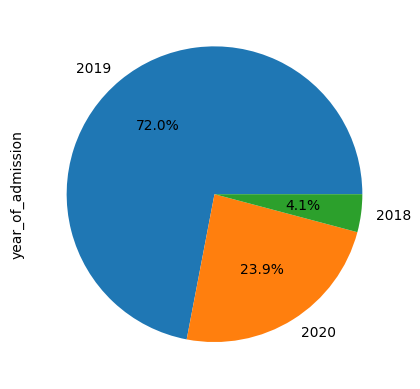

<Figure size 2000x3000 with 0 Axes>

In [ ]:
status = marksheet['year_of_admission'].value_counts()

status.plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(20, 30))
plt.show()

# Data Analysis

***We start analysis by dividing data into three based on the categorical value year_of_admission***

In [ ]:
# diving data into 3 as per categorical column year

data_2018 = marksheet[marksheet['year_of_admission'] == 2018]
data_2019 = marksheet[marksheet['year_of_admission'] == 2019]
data_2020 = marksheet[marksheet['year_of_admission'] == 2020]

## Statistical Analysis



***We start statistical analysis by creating correlation matrix to identify pattern. We take internal assesment, external exam marks of 10 subjects and total grade_point of each student and compare yearly performance. This matrix is visualised using heatmap to make identifying patterns and treands easier***

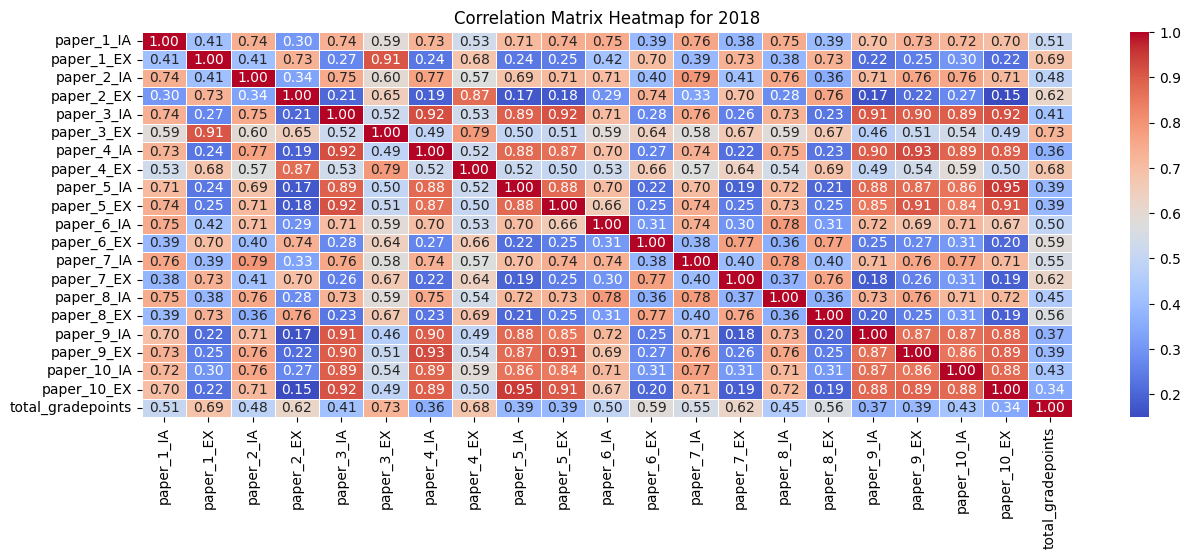

In [ ]:
# creating a correlation matrix students of admission year 2018

columns = ['paper_1_IA','paper_1_EX',
            'paper_2_IA','paper_2_EX',
             'paper_3_IA','paper_3_EX',
             'paper_4_IA','paper_4_EX',
             'paper_5_IA','paper_5_EX',
             'paper_6_IA','paper_6_EX',
             'paper_7_IA','paper_7_EX',
             'paper_8_IA','paper_8_EX',
             'paper_9_IA','paper_9_EX',
             'paper_10_IA','paper_10_EX','total_gradepoints']

correlation_matrix2018 = data_2018[columns].corr()

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix2018, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for 2018')
plt.show()

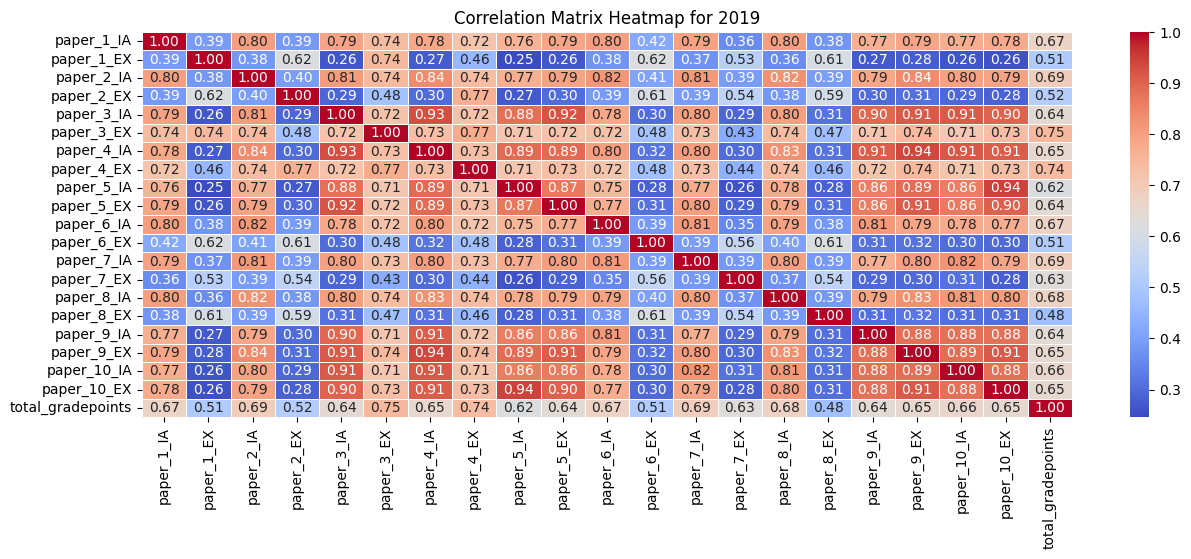

In [ ]:
# correlation matrix and heat map for students of admission year 2019 data

correlation_matrix2019 = data_2019[columns].corr()

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix2019, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for 2019')
plt.show()

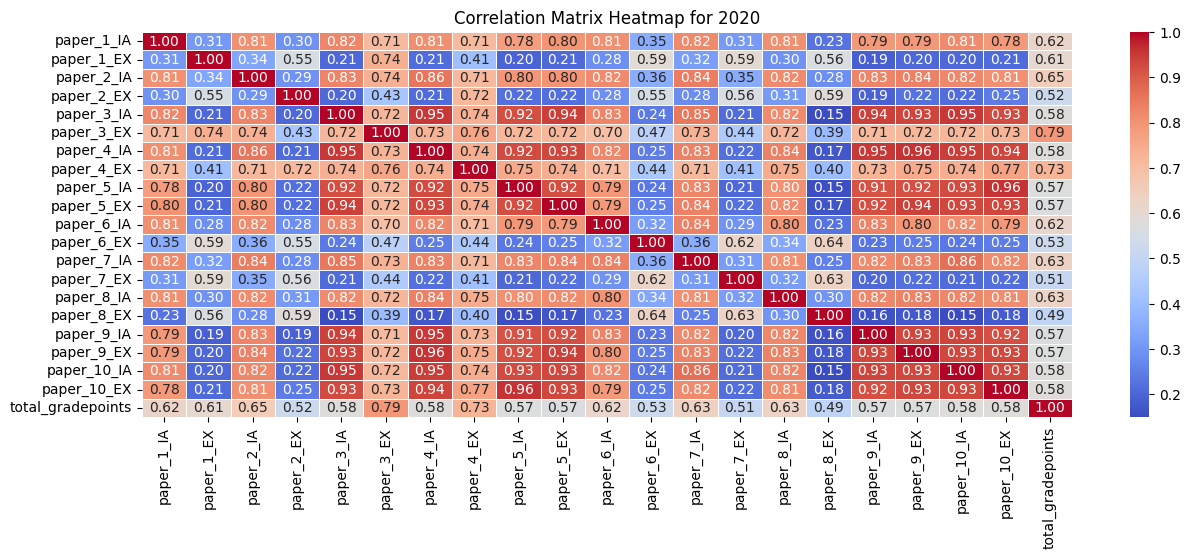

In [ ]:
# correlation matrix and heat map for students of admission year 2020 data

correlation_matrix2020 = data_2020[columns].corr()

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix2020, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for 2020')
plt.show()

***Box Plot analysis to check the ditribution of data***

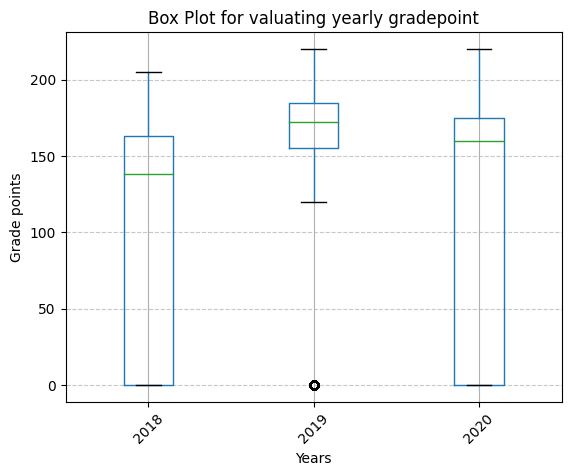

In [ ]:
data = data_2018['total_gradepoints']
data2 = data_2019['total_gradepoints']
data3 = data_2020 ['total_gradepoints']

df = pd.DataFrame({'2018': data, '2019': data2, '2020': data3})


df.boxplot()

plt.scatter

plt.xlabel('Years')
plt.ylabel('Grade points')
plt.title('Box Plot for valuating yearly gradepoint')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Categorical Analysis

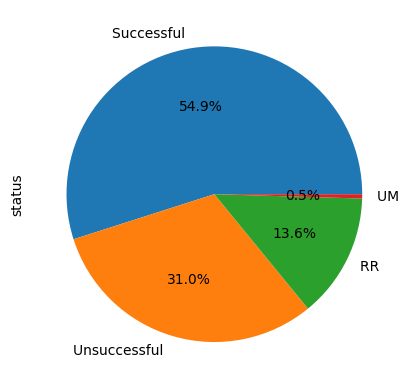

<Figure size 2000x3000 with 0 Axes>

In [ ]:
# pie-chart showing success rate in 2018

d_18 = data_2018['status'].value_counts()
d_18.plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(20, 30))
plt.show()

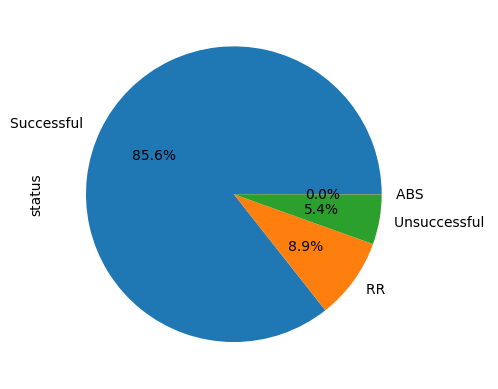

<Figure size 2000x3000 with 0 Axes>

In [ ]:
# pie-chart showing success rate in 2019

d_19 = data_2019['status'].value_counts()
d_19.plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(20, 30))
plt.show()

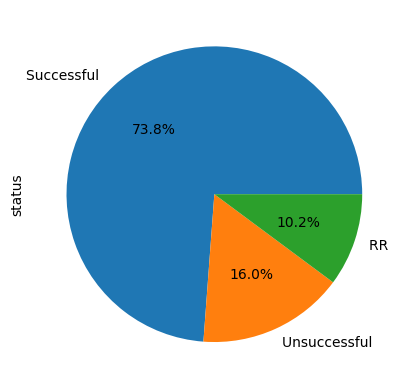

<Figure size 2000x3000 with 0 Axes>

In [ ]:
# pie-chart showing success rate in 2020

d_20 = data_2020['status'].value_counts()
d_20.plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(20, 30))
plt.show()

# Data Encoding

## One-hot encoding

In [ ]:
# One-hot encoding for gender column
categorical_data = marksheet['gender']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

df = pd.DataFrame({'Category': categorical_data})

# Perform one-hot encoding using the get_dummies() function
one_hot_encoded = pd.get_dummies(df['Category'])

marksheet = pd.concat([marksheet, one_hot_encoded], axis=1)

marksheet


,seat_no,paper_1_IA,paper_1_EX,paper_1_TOT,paper_2_IA,paper_2_EX,paper_2_TOT,paper_3_IA,paper_3_EX,paper_3_TOT,...,paper_10_IA,paper_10_EX,paper_10_TOT,total_gradepoints,sgpi,status,year_of_admission,gender,F,M
0,5201541,18.0,52.0,70.0,19.0,57.0,76.0,22.0,52.0,74.0,...,19.0,22.0,41.0,201.0,9.14,Successful,2020,M,0,1
1,5201542,15.0,53.0,68.0,18.0,51.0,69.0,21.0,53.0,74.0,...,18.0,23.0,41.0,178.0,8.09,Successful,2020,M,0,1
2,5201543,20.0,50.0,70.0,20.0,44.0,64.0,22.0,50.0,72.0,...,23.0,24.0,47.0,175.0,7.95,Successful,2018,M,0,1
3,5201544,16.0,47.0,63.0,17.0,45.0,62.0,17.0,47.0,64.0,...,16.0,23.0,39.0,166.0,7.55,Successful,2019,M,0,1
4,5201545,19.0,50.0,69.0,18.0,42.0,60.0,18.0,50.0,68.0,...,13.0,18.0,31.0,177.0,8.05,Successful,2019,M,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5018234,18.0,51.0,69.0,17.0,60.0,77.0,22.0,51.0,73.0,...,20.0,23.0,43.0,187.0,8.50,Successful,2019,M,0,1
5207,5018235,20.0,58.0,78.0,19.0,47.0,66.0,23.0,58.0,81.0,...,23.0,22.0,45.0,193.0,8.77,Successful,2019,M,0,1
5208,5018236,17.0,50.0,67.0,16.0,40.0,56.0,19.0,50.0,69.0,...,18.0,20.0,38.0,170.0,7.73,Successful,2019,F,1,0
5209,5018237,20.0,40.0,60.0,18.0,33.0,51.0,23.0,40.0,63.0,...,24.0,23.0,47.0,175.0,7.95,Successful,2019,M,0,1


In [ ]:
# droping gender column after encoding

marksheet = marksheet.drop('gender', axis=1)
marksheet

,seat_no,paper_1_IA,paper_1_EX,paper_1_TOT,paper_2_IA,paper_2_EX,paper_2_TOT,paper_3_IA,paper_3_EX,paper_3_TOT,...,paper_9_TOT,paper_10_IA,paper_10_EX,paper_10_TOT,total_gradepoints,sgpi,status,year_of_admission,F,M
0,5201541,18.0,52.0,70.0,19.0,57.0,76.0,22.0,52.0,74.0,...,41.0,19.0,22.0,41.0,201.0,9.14,Successful,2020,0,1
1,5201542,15.0,53.0,68.0,18.0,51.0,69.0,21.0,53.0,74.0,...,41.0,18.0,23.0,41.0,178.0,8.09,Successful,2020,0,1
2,5201543,20.0,50.0,70.0,20.0,44.0,64.0,22.0,50.0,72.0,...,42.0,23.0,24.0,47.0,175.0,7.95,Successful,2018,0,1
3,5201544,16.0,47.0,63.0,17.0,45.0,62.0,17.0,47.0,64.0,...,35.0,16.0,23.0,39.0,166.0,7.55,Successful,2019,0,1
4,5201545,19.0,50.0,69.0,18.0,42.0,60.0,18.0,50.0,68.0,...,34.0,13.0,18.0,31.0,177.0,8.05,Successful,2019,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5018234,18.0,51.0,69.0,17.0,60.0,77.0,22.0,51.0,73.0,...,41.0,20.0,23.0,43.0,187.0,8.50,Successful,2019,0,1
5207,5018235,20.0,58.0,78.0,19.0,47.0,66.0,23.0,58.0,81.0,...,44.0,23.0,22.0,45.0,193.0,8.77,Successful,2019,0,1
5208,5018236,17.0,50.0,67.0,16.0,40.0,56.0,19.0,50.0,69.0,...,39.0,18.0,20.0,38.0,170.0,7.73,Successful,2019,1,0
5209,5018237,20.0,40.0,60.0,18.0,33.0,51.0,23.0,40.0,63.0,...,44.0,24.0,23.0,47.0,175.0,7.95,Successful,2019,0,1


## Label Encoding

In [ ]:
# label-encoding for status column
categorical_data = marksheet['status']

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical data to obtain encoded labels
encoded_labels = encoder.fit_transform(categorical_data)

# Add the encoded labels as a new column in the existing DataFrame 'df'
marksheet['Encoded_status'] = encoded_labels

# Print the modified DataFrame with the encoded labels
marksheet

,seat_no,paper_1_IA,paper_1_EX,paper_1_TOT,paper_2_IA,paper_2_EX,paper_2_TOT,paper_3_IA,paper_3_EX,paper_3_TOT,...,paper_10_IA,paper_10_EX,paper_10_TOT,total_gradepoints,sgpi,status,year_of_admission,F,M,Encoded_status
0,5201541,18.0,52.0,70.0,19.0,57.0,76.0,22.0,52.0,74.0,...,19.0,22.0,41.0,201.0,9.14,Successful,2020,0,1,2
1,5201542,15.0,53.0,68.0,18.0,51.0,69.0,21.0,53.0,74.0,...,18.0,23.0,41.0,178.0,8.09,Successful,2020,0,1,2
2,5201543,20.0,50.0,70.0,20.0,44.0,64.0,22.0,50.0,72.0,...,23.0,24.0,47.0,175.0,7.95,Successful,2018,0,1,2
3,5201544,16.0,47.0,63.0,17.0,45.0,62.0,17.0,47.0,64.0,...,16.0,23.0,39.0,166.0,7.55,Successful,2019,0,1,2
4,5201545,19.0,50.0,69.0,18.0,42.0,60.0,18.0,50.0,68.0,...,13.0,18.0,31.0,177.0,8.05,Successful,2019,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5018234,18.0,51.0,69.0,17.0,60.0,77.0,22.0,51.0,73.0,...,20.0,23.0,43.0,187.0,8.50,Successful,2019,0,1,2
5207,5018235,20.0,58.0,78.0,19.0,47.0,66.0,23.0,58.0,81.0,...,23.0,22.0,45.0,193.0,8.77,Successful,2019,0,1,2
5208,5018236,17.0,50.0,67.0,16.0,40.0,56.0,19.0,50.0,69.0,...,18.0,20.0,38.0,170.0,7.73,Successful,2019,1,0,2
5209,5018237,20.0,40.0,60.0,18.0,33.0,51.0,23.0,40.0,63.0,...,24.0,23.0,47.0,175.0,7.95,Successful,2019,0,1,2


In [ ]:
# trying to capture encoding values
marksheet['Encoded_status'].value_counts()

2    4200
1     484
4     465
3       1
0       1
Name: Encoded_status, dtype: int64

In [ ]:
marksheet['status'].value_counts()

Successful       4200
RR                484
Unsuccessful      465
UM                  1
ABS                 1
Name: status, dtype: int64

In [ ]:
#droping status column to avoid redundancy

marksheet = marksheet.drop('status', axis=1)
marksheet

,seat_no,paper_1_IA,paper_1_EX,paper_1_TOT,paper_2_IA,paper_2_EX,paper_2_TOT,paper_3_IA,paper_3_EX,paper_3_TOT,...,paper_9_TOT,paper_10_IA,paper_10_EX,paper_10_TOT,total_gradepoints,sgpi,year_of_admission,F,M,Encoded_status
0,5201541,18.0,52.0,70.0,19.0,57.0,76.0,22.0,52.0,74.0,...,41.0,19.0,22.0,41.0,201.0,9.14,2020,0,1,2
1,5201542,15.0,53.0,68.0,18.0,51.0,69.0,21.0,53.0,74.0,...,41.0,18.0,23.0,41.0,178.0,8.09,2020,0,1,2
2,5201543,20.0,50.0,70.0,20.0,44.0,64.0,22.0,50.0,72.0,...,42.0,23.0,24.0,47.0,175.0,7.95,2018,0,1,2
3,5201544,16.0,47.0,63.0,17.0,45.0,62.0,17.0,47.0,64.0,...,35.0,16.0,23.0,39.0,166.0,7.55,2019,0,1,2
4,5201545,19.0,50.0,69.0,18.0,42.0,60.0,18.0,50.0,68.0,...,34.0,13.0,18.0,31.0,177.0,8.05,2019,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5018234,18.0,51.0,69.0,17.0,60.0,77.0,22.0,51.0,73.0,...,41.0,20.0,23.0,43.0,187.0,8.50,2019,0,1,2
5207,5018235,20.0,58.0,78.0,19.0,47.0,66.0,23.0,58.0,81.0,...,44.0,23.0,22.0,45.0,193.0,8.77,2019,0,1,2
5208,5018236,17.0,50.0,67.0,16.0,40.0,56.0,19.0,50.0,69.0,...,39.0,18.0,20.0,38.0,170.0,7.73,2019,1,0,2
5209,5018237,20.0,40.0,60.0,18.0,33.0,51.0,23.0,40.0,63.0,...,44.0,24.0,23.0,47.0,175.0,7.95,2019,0,1,2


# ML Modeling and Accuracy Testing

## Splitting Dataset

In [ ]:
# assigning target value and predictors, Encoded_status as target value
X = marksheet.drop('Encoded_status',axis=1)
y = marksheet['Encoded_status']

# for decision tree visualization
X1 = marksheet.drop('Encoded_status',axis=1)
y1 = marksheet['Encoded_status']

In [ ]:
# converting values to array

X = X.values
y = y.values

In [ ]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Decision Tree Classifier Model

In [ ]:
# Train Decision Tree Model

# Create the decision tree model
dt_model = DecisionTreeClassifier(min_samples_split=12, min_samples_leaf=7)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate accuracy on the training set
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)

# Calculate accuracy on the validation set (if needed)
if X_val is not None and y_val is not None:
    y_val_pred_dt = dt_model.predict(X_val)
    val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
else:
    val_accuracy_dt = None

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
confusion_mat_dt = confusion_matrix(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy_dt}")
print(f"Validation Accuracy: {val_accuracy_dt}")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", confusion_mat_dt)
print("Classification Report:\n", classification_rep_dt)

Training Accuracy: 0.9948220064724919
Validation Accuracy: 0.9922330097087378
Accuracy: 0.9922405431619786
Confusion Matrix:
 [[ 98   0   2]
 [  0 850   0]
 [  6   0  75]]
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       100
           2       1.00      1.00      1.00       850
           4       0.97      0.93      0.95        81

    accuracy                           0.99      1031
   macro avg       0.97      0.97      0.97      1031
weighted avg       0.99      0.99      0.99      1031



In [ ]:
# visual representation of decision tree created
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X1.columns.tolist(),
                           class_names=[str(c) for c in np.unique(y)],  # Convert class labels to strings
                           filled=True, rounded=True,
                           special_characters=True)

# Render the tree visualization
graph = graphviz.Source(dot_data)
graph.view()


'Source.gv.pdf'

## Random Forest Classifier Model

In [ ]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

 #Calculate accuracy on the training set
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculate accuracy on the validation set (if needed)
if X_val is not None and y_val is not None:
    y_val_pred_rf = rf_model.predict(X_val)
    val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
else:
    val_accuracy_rf = None

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
confusion_mat_rf = confusion_matrix(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Validation Accuracy: {val_accuracy_rf}")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:\n", confusion_mat_rf)
print("Classification Report:\n", classification_rep_rf)


Training Accuracy: 0.9970873786407767
Validation Accuracy: 0.9932038834951457
Accuracy: 0.9941804073714839
Confusion Matrix:
 [[ 98   0   2]
 [  0 850   0]
 [  4   0  77]]
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       100
           2       1.00      1.00      1.00       850
           4       0.97      0.95      0.96        81

    accuracy                           0.99      1031
   macro avg       0.98      0.98      0.98      1031
weighted avg       0.99      0.99      0.99      1031



## Gradiant Boosting Machine (GBM) Model

In [ ]:
# Train GBM Model

gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=5)

# Train the model on the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbm_model.predict(X_test)

# Calculate accuracy on the training set
y_train_pred_gbm = gbm_model.predict(X_train)
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)

# Calculate accuracy on the validation set (if needed)
if X_val is not None and y_val is not None:
    y_val_pred = gbm_model.predict(X_val)
    val_accuracy_gbm = accuracy_score(y_val, y_val_pred)
else:
    val_accuracy_gbm = None


# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred)
confusion_mat_gbm = confusion_matrix(y_test, y_pred)
classification_gbm = classification_report(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy_gbm}")
print(f"Validation Accuracy: {val_accuracy_gbm}")
print(f"Testing Accuracy: {accuracy_gbm}")
print("Confusion Matrix:\n", confusion_mat_gbm)
print("Classification Report:\n", classification_gbm)


Training Accuracy: 1.0
Validation Accuracy: 0.9951456310679612
Testing Accuracy: 0.9951503394762367
Confusion Matrix:
 [[ 99   0   1]
 [  0 850   0]
 [  4   0  77]]
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.99      0.98       100
           2       1.00      1.00      1.00       850
           4       0.99      0.95      0.97        81

    accuracy                           1.00      1031
   macro avg       0.98      0.98      0.98      1031
weighted avg       1.00      1.00      1.00      1031



## Performance valuation of models round 1 (Train, validation and test accuracy)

In [ ]:

training_accuracy_values = [train_accuracy_dt, train_accuracy_dt, train_accuracy_gbm]
validation_accuracy_values = [val_accuracy_dt, val_accuracy_dt, val_accuracy_gbm]
test_accuracy_values = [accuracy_dt, accuracy_dt, accuracy_gbm]


# List of model names
model_names = ['Decission Tree', 'Random Forest', 'Gradient Boosting Machine']

# Create a DataFrame to tabulate the metrics
accuracy_values_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': test_accuracy_values,
    'Validation Accuracy': test_accuracy_values,
    'Test Accuracy': test_accuracy_values
})

# Display the DataFrame
accuracy_values_df

,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,Decission Tree,0.992241,0.992241,0.992241
1,Random Forest,0.992241,0.992241,0.992241
2,Gradient Boosting Machine,0.995150,0.995150,0.995150


## Performance valuation of models round 2 (Classification report and confusion matrix)

In [ ]:
classification_report_values = [classification_rep_dt, classification_rep_rf, classification_gbm]
confusion_matrix_values = [confusion_mat_dt, confusion_mat_rf, confusion_mat_gbm]

# Create a DataFrame to tabulate the metrics
perf_val_df = pd.DataFrame({
    'Model': model_names,
    'Classification Report': classification_report_values,
    'Confusion Matrix': confusion_matrix_values
})

perf_val_df

,Model,Classification Report,Confusion Matrix
0,Decission Tree,precision recall f1-score ...,"[[98, 0, 2], [0, 850, 0], [6, 0, 75]]"
1,Random Forest,precision recall f1-score ...,"[[98, 0, 2], [0, 850, 0], [4, 0, 77]]"
2,Gradient Boosting Machine,precision recall f1-score ...,"[[99, 0, 1], [0, 850, 0], [4, 0, 77]]"
